In [1]:
#import all the requirements
import numpy as np
import pandas as pd
import sklearn
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [2]:
#Load the data from the file. Make sure the file is in the same folder
df_census = pd.read_csv('census1994.csv')

#return the first 5 rows of the dataset
print("First 5 records")
df_census.head()

First 5 records


,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#return the last 5 rows of the dataset
print("Last 5 records")
df_census.tail()

Last 5 records


,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
32556,12/29/1994,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1/30/1994,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,9/26/1994,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,4/5/1994,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,3/5/1994,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
#Remove all the data with '?' as the value
df = (df_census.where(df_census !=' ?').dropna())
print(len(df))

30162


In [6]:
#Split the data into X and target(Y)
data = df[['education-num','occupation','class']]
target = data['class']
del data['class']
data = pd.get_dummies(data)

#Split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(data, target, train_size = 0.7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((21113, 15), (9049, 15), (21113,), (9049,))

In [7]:
accuracies = []  #List to store accuracies of all the classifiers of KNN

#KNN classifier for 3 neighbors
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3,metric = "euclidean")
#Training the classifier
knn3.fit(X_train, Y_train)
#Get the accuracy
acc = knn3.score(X_test, Y_test)
accuracies.append(100*acc)
print('KNN score for 3 neighbors: %f' % acc)
#predict and create confusion matrix
predicted_income = knn3.predict(X_test)
table = sklearn.metrics.confusion_matrix(Y_test, predicted_income)
print("Confusion Matrix: \n",table)
#Create and Classification report
print(sklearn.metrics.classification_report(Y_test, predicted_income))

#KNN classifier for 5 neighbors
knn5 = neighbors.KNeighborsClassifier(n_neighbors = 5,metric = "euclidean")
#Training the classifier
knn5.fit(X_train, Y_train)
#Get the accuracy
acc = knn5.score(X_test, Y_test)
accuracies.append(100*acc)
print('KNN score for 5 neighbors: %f' % acc)
#predict and create confusion matrix
predicted_income = knn5.predict(X_test)
table = sklearn.metrics.confusion_matrix(Y_test, predicted_income)
print("Confusion Matrix: \n",table)
#Create and Classification report
print(sklearn.metrics.classification_report(Y_test, predicted_income))

#KNN classifier for 7 neighbors
knn7 = neighbors.KNeighborsClassifier(n_neighbors = 7,metric = "euclidean")
#Training the classifier
knn7.fit(X_train, Y_train)
#Get the accuracy
acc = knn7.score(X_test, Y_test)
accuracies.append(100*acc)
print('KNN score for 7 neighbors: %f' % acc)
#predict and create confusion matrix
predicted_income = knn7.predict(X_test)
table = sklearn.metrics.confusion_matrix(Y_test, predicted_income)
print("Confusion Matrix: \n",table)
#Create and Classification report
print(sklearn.metrics.classification_report(Y_test, predicted_income))

KNN score for 3 neighbors: 0.742623
Confusion Matrix: 
 [[5882  932]
 [1397  838]]
              precision    recall  f1-score   support

       <=50K       0.81      0.86      0.83      6814
        >50K       0.47      0.37      0.42      2235

    accuracy                           0.74      9049
   macro avg       0.64      0.62      0.63      9049
weighted avg       0.73      0.74      0.73      9049

KNN score for 5 neighbors: 0.767709
Confusion Matrix: 
 [[6169  645]
 [1457  778]]
              precision    recall  f1-score   support

       <=50K       0.81      0.91      0.85      6814
        >50K       0.55      0.35      0.43      2235

    accuracy                           0.77      9049
   macro avg       0.68      0.63      0.64      9049
weighted avg       0.74      0.77      0.75      9049

KNN score for 7 neighbors: 0.775776
Confusion Matrix: 
 [[6294  520]
 [1509  726]]
              precision    recall  f1-score   support

       <=50K       0.81      0.92      0.8

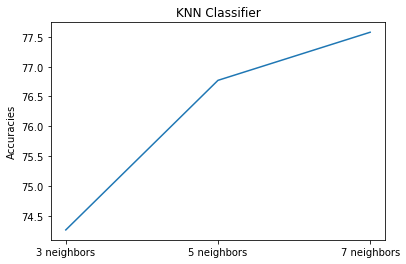

In [8]:
#Print the accuracies as a graph to compare between the classifiers
objects = ('3 neighbors','5 neighbors','7 neighbors')
y_pos = np.arange(len(objects))

plt.plot(y_pos, accuracies)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracies')
plt.title('KNN Classifier')

plt.show()